In [1]:
import pandas as pd

In [10]:
data = pd.read_csv('Global Dataset of Inflation.csv',encoding='unicode_escape')

In [11]:
data.head()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,...,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN


In [14]:
data.describe

<bound method NDFrame.describe of     Country Code  IMF Country Code               Country Indicator Type  \
0            ABW             314.0                 Aruba      Inflation   
1            AFG             512.0           Afghanistan      Inflation   
2            AGO             614.0                Angola      Inflation   
3            ALB             914.0               Albania      Inflation   
4            ARE             466.0  United Arab Emirates      Inflation   
..           ...               ...                   ...            ...   
778          VEN             299.0         Venezuela, RB      Inflation   
779          VNM             582.0               Vietnam      Inflation   
780          XKX             967.0                Kosovo      Inflation   
781          ZAF             199.0          South Africa      Inflation   
782          ZMB             754.0                Zambia      Inflation   

                           Series Name   1970   1971   1972   197

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  783 non-null    object 
 1   Country       783 non-null    object 
 2   1970          422 non-null    float64
 3   1971          428 non-null    float64
 4   1972          430 non-null    float64
 5   1973          430 non-null    float64
 6   1974          434 non-null    float64
 7   1975          434 non-null    float64
 8   1976          430 non-null    float64
 9   1977          427 non-null    float64
 10  1978          428 non-null    float64
 11  1979          428 non-null    float64
 12  1980          433 non-null    float64
 13  1981          451 non-null    float64
 14  1982          458 non-null    float64
 15  1983          464 non-null    float64
 16  1984          470 non-null    float64
 17  1985          466 non-null    float64
 18  1986          475 non-null    

In [25]:
# Drop unnecessary columns
data = data.drop(['Country Code', 'Indicator Type', 'Series Name'], axis=1)

# Melt the dataset to reshape it (wide to long format)
data_melted = pd.melt(data, id_vars=['Country Code', 'Country'], var_name='Year', value_name='Inflation')

# Convert 'Year' to numeric (if it's not already)
data_melted['Year'] = pd.to_numeric(data_melted['Year'], errors='coerce')

# Drop rows where 'Inflation' is NaN
data_melted = data_melted.dropna(subset=['Inflation'])

# Display the cleaned data
print(data_melted.head())

KeyError: "['Indicator Type', 'Series Name'] not found in axis"

In [24]:
data.columns

Index(['Country Code', 'Country', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', 'Note', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63'],
      dtype='object')

In [26]:
# Drop unnecessary columns like 'Note' and the unnamed columns
data = data.drop(['Note', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63'], axis=1)

# Melt the dataset to reshape it (wide to long format)
data_melted = pd.melt(data, id_vars=['Country Code', 'Country'], var_name='Year', value_name='Inflation')


In [27]:
data_melted.head()

,Country Code,Country,Year,Inflation
0,ABW,Aruba,1970,NaN
1,AFG,Afghanistan,1970,25.51
2,AGO,Angola,1970,7.97
3,ALB,Albania,1970,NaN
4,ARE,United Arab Emirates,1970,21.98


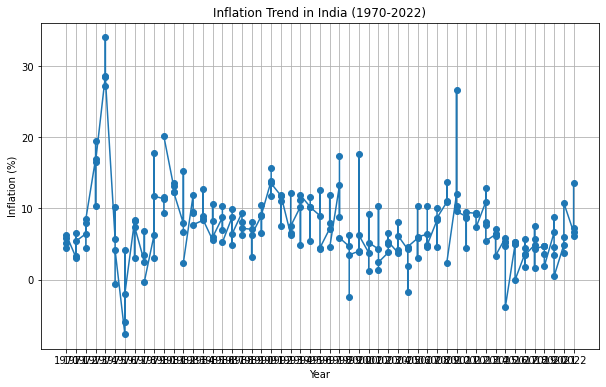

In [28]:
import matplotlib.pyplot as plt

# Group by Country to visualize inflation trends for a specific country
country_data = data_melted[data_melted['Country'] == 'India']

# Plot the inflation trend over the years
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['Inflation'], marker='o')
plt.title('Inflation Trend in India (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation (%)')
plt.grid(True)
plt.show()
